In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data_set=pd.read_csv('train.csv')
data_set.head(10)
data_set.shape

(1460, 81)

In [11]:
data_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
    features_with_na=[features for features in data_set.columns if data_set[features].isnull().sum()>1]
    for features in features_with_na:
        print(features, np.round(data_set[features].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [13]:
#we will check for dependancy of missing values on salesprice so for that we will find the relationship between them
for feature in features_with_na:
    data=data_set.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)

    data.groupby(feature['SalePrice'].median().plot.bar())
    plt.title(feature)
    plt.show()

TypeError: string indices must be integers, not 'str'

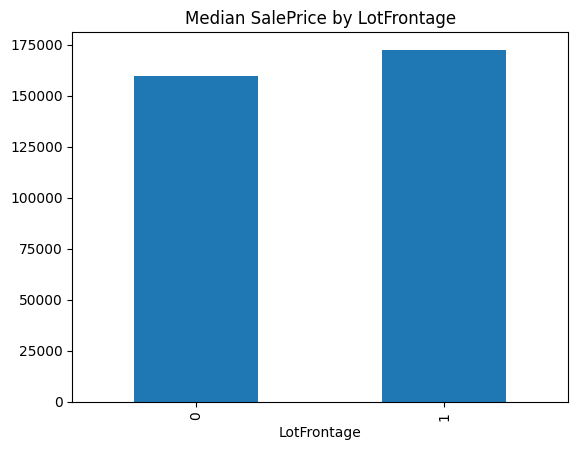

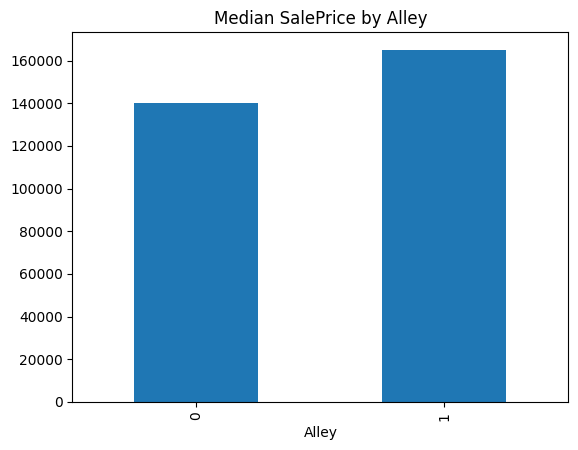

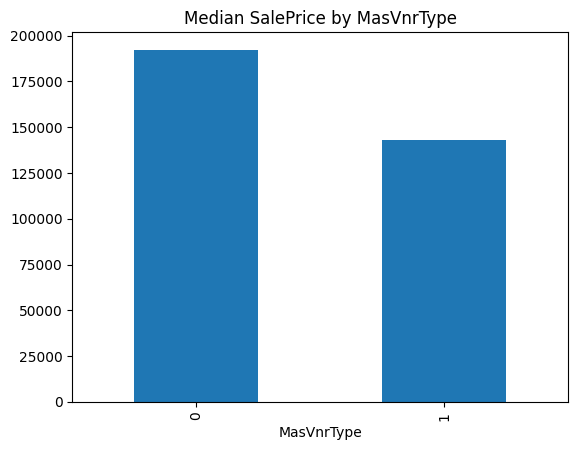

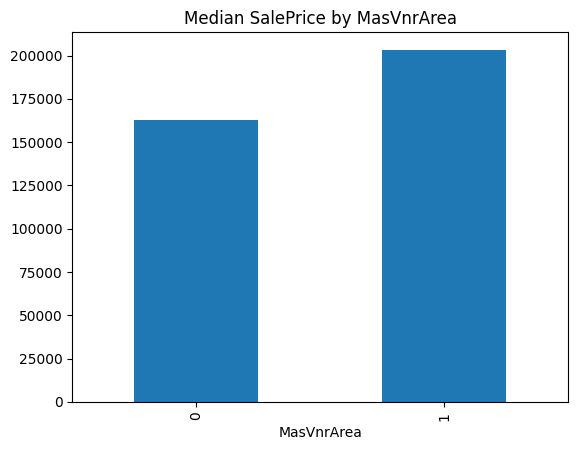

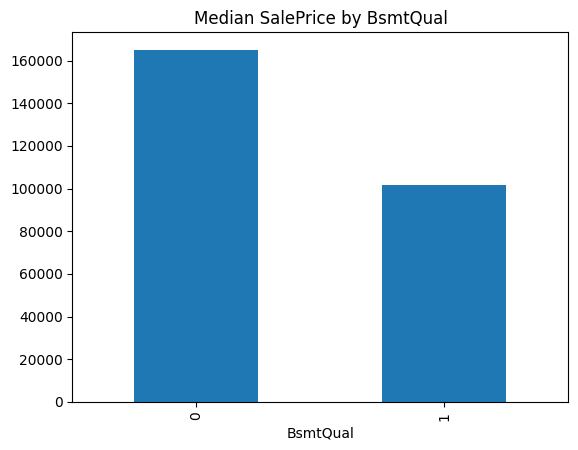

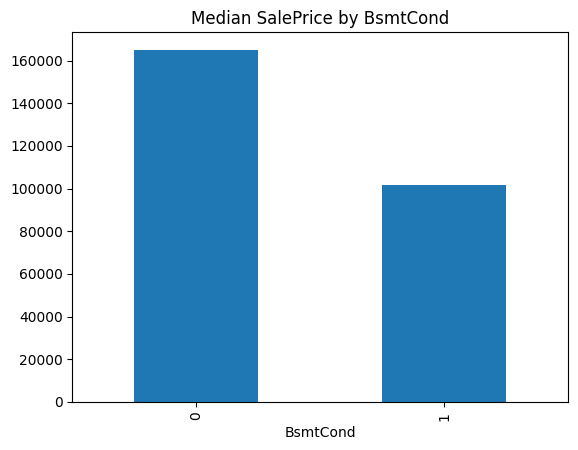

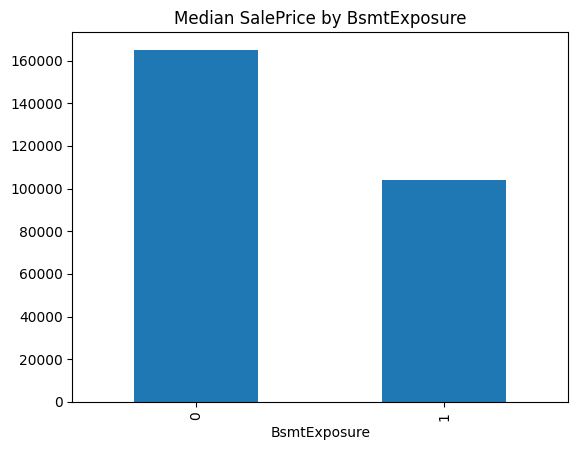

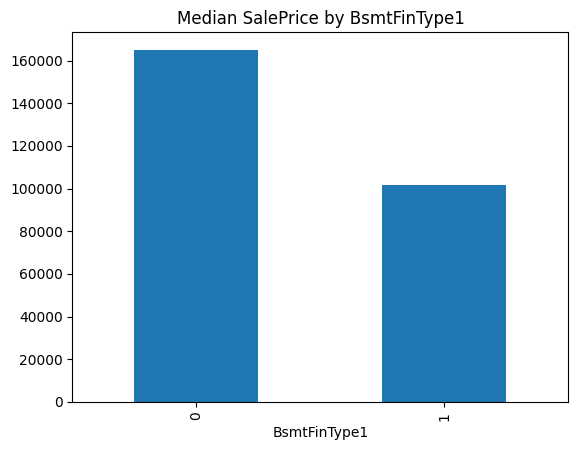

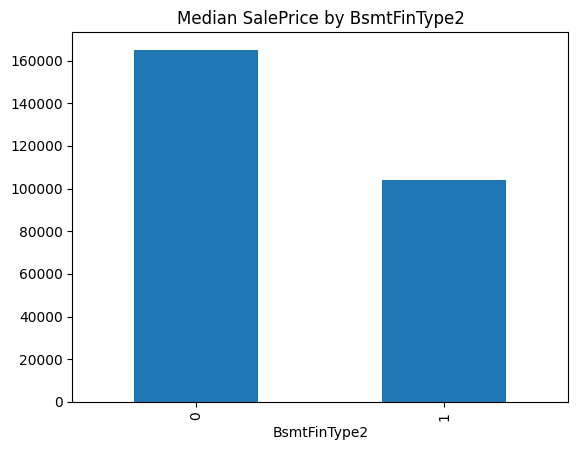

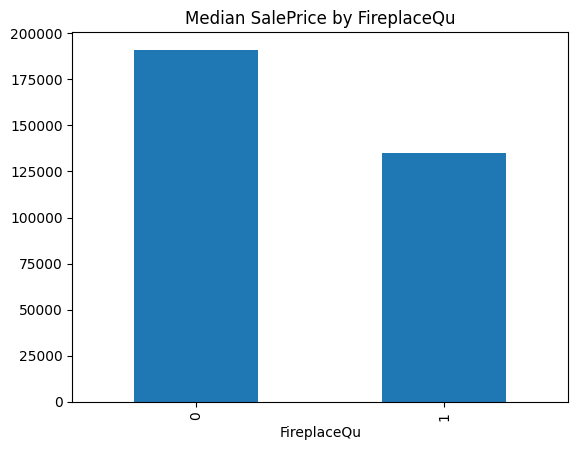

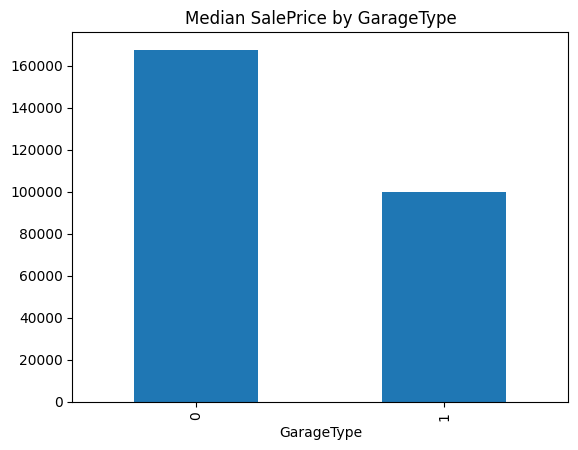

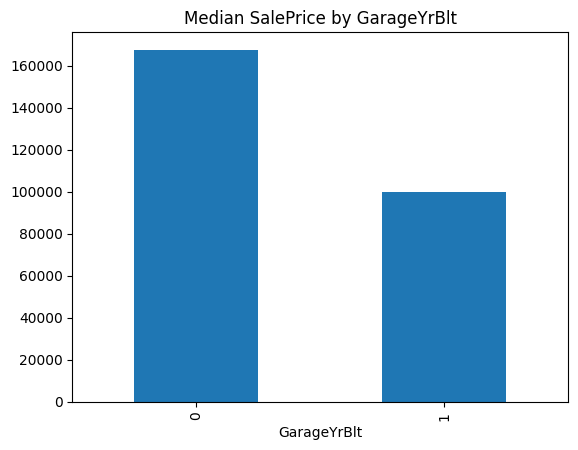

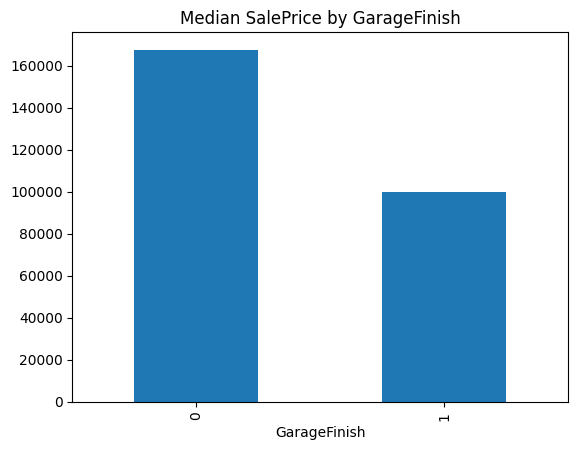

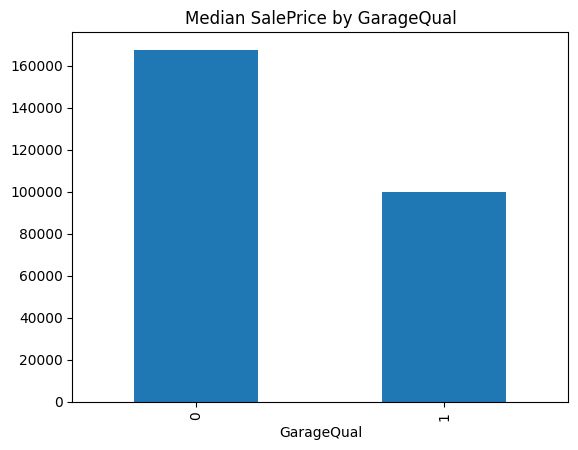

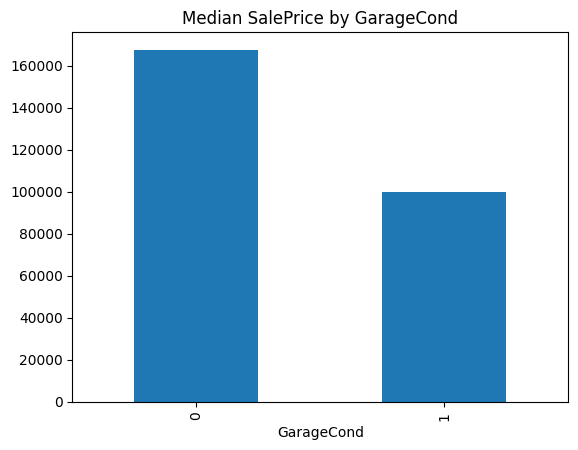

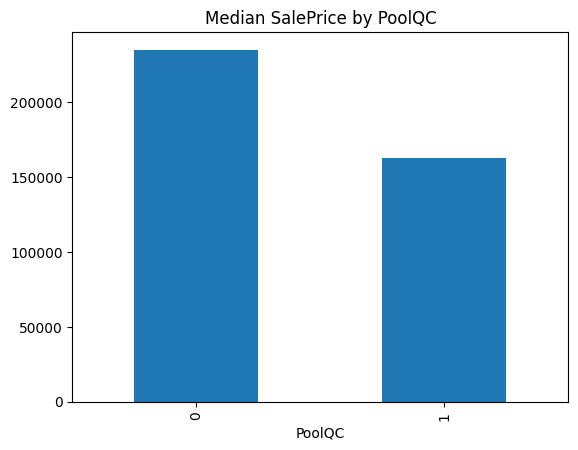

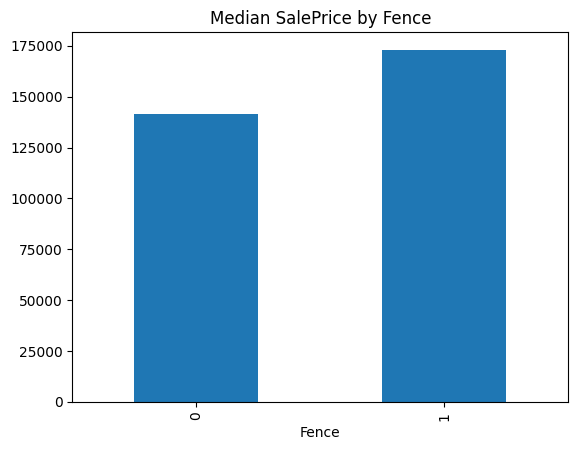

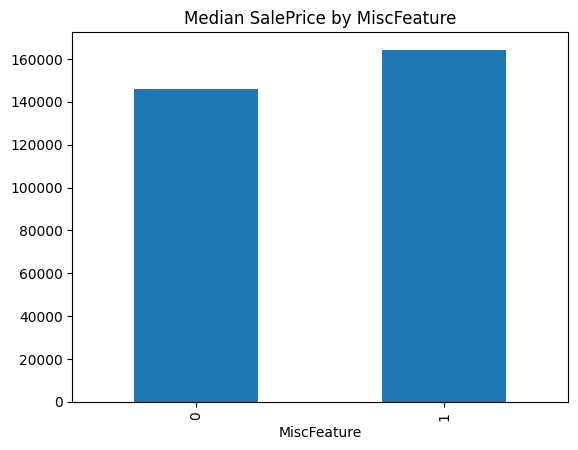

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for feature in features_with_na:
    # Create a copy of the dataset outside the loop
    data = data_set.copy()

    # Replace missing values with 1 and non-missing values with 0
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # Group by the feature and calculate the median of 'SalePrice'
    median_sale_price = data.groupby(feature)['SalePrice'].median()

    # Plot the bar chart
    median_sale_price.plot(kind='bar')
    
    # Set plot title
    plt.title(f'Median SalePrice by {feature}')
    
    # Show the plot
    plt.show()


In [ ]:
numerical_feature=[feature for feature in data_set.columns if data_set[feature].dtype !='O']
#HERE o MEANS OBJECT SINCE WE ARE SELECTING THE NUMERICAL COLUMNS SO WE NEED TO CHECK HOW MANY NUMERICAL COLUMN EXIST
print('Number of numerical variables: ',len(numerical_feature))

data_set[numerical_feature].head()
                                            

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# now we will see how many year varibles exist in our dataset by checking the number number off features which have Yr or year as in there name
year_feature=[feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
#lets explore the conctent of feature
for feature in year_feature:
    print(feature,data_set[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House price vs yearSold')

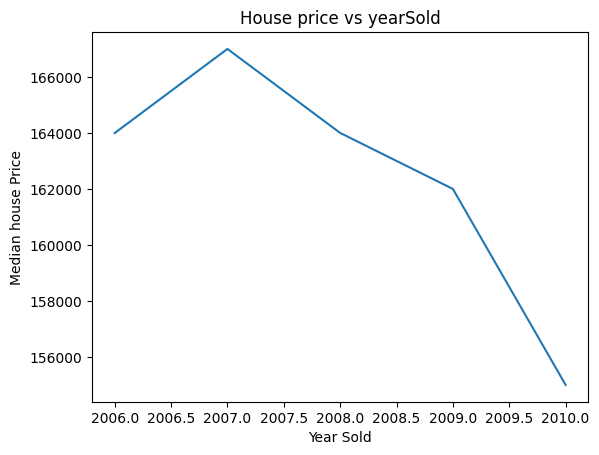

In [ ]:
# Lets analyze the Temporal datetime varibles
data_set.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median house Price')
plt.title('House price vs yearSold')
#from the graph it is evident that as the year increses the prices of houses are dereasing but we need more data to support it
#group by function creates a sperate group for each unique value in year sold and corresponding to it calculate the median of each group for salePrice and plot it on the graph for each unique group in yrSold

In [ ]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

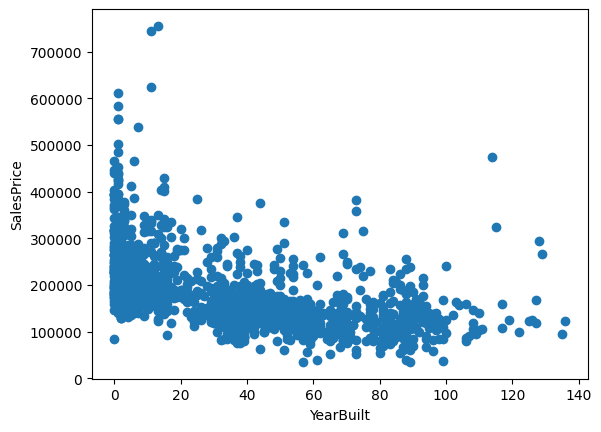

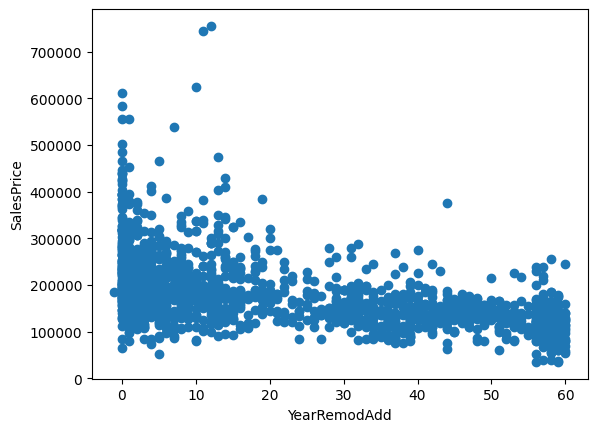

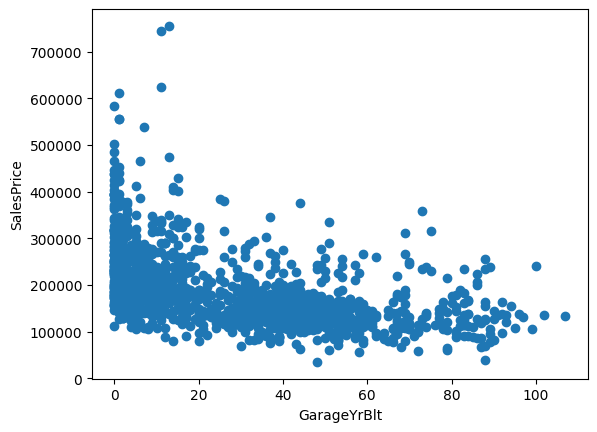

In [ ]:
for feature in year_feature:
    if feature!='YrSold':
        data=data_set.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.show()
    

In [ ]:
discrete_feature=[feature for feature in numerical_feature if len(data_set[feature].unique())<25 and feature not in year_feature+['Id']]

In [ ]:
len(discrete_feature)

17

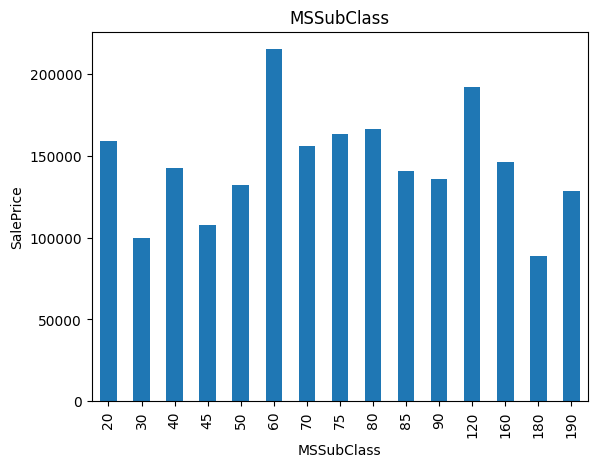

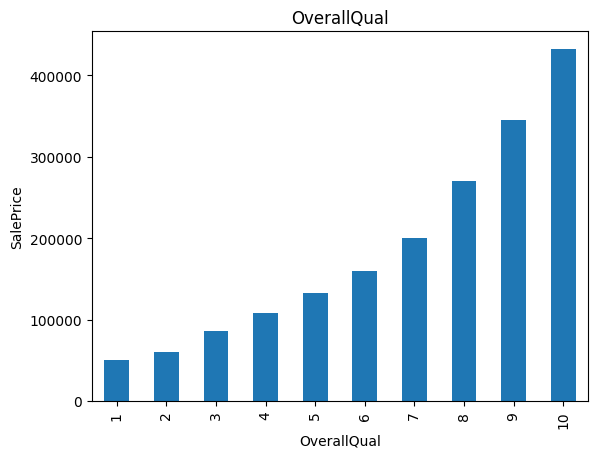

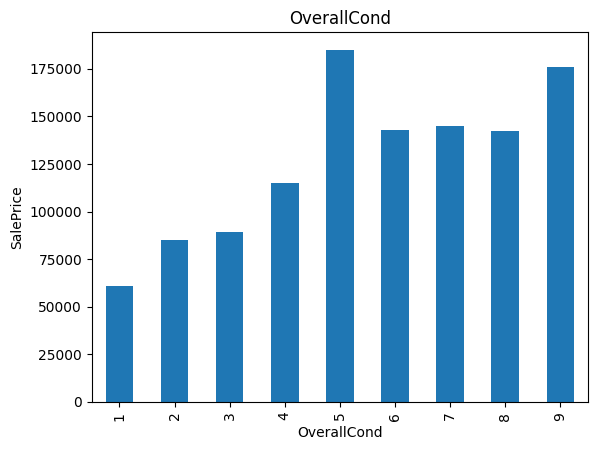

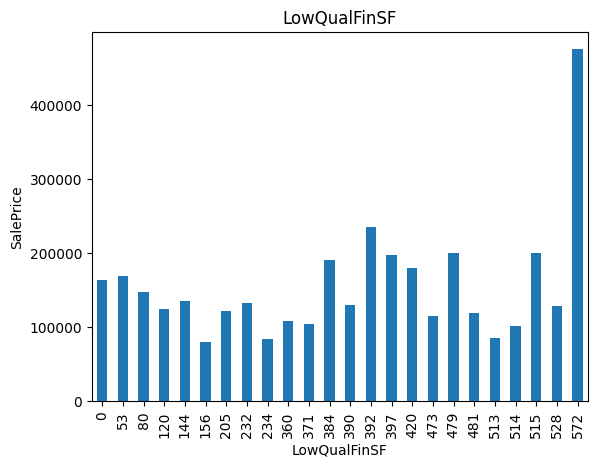

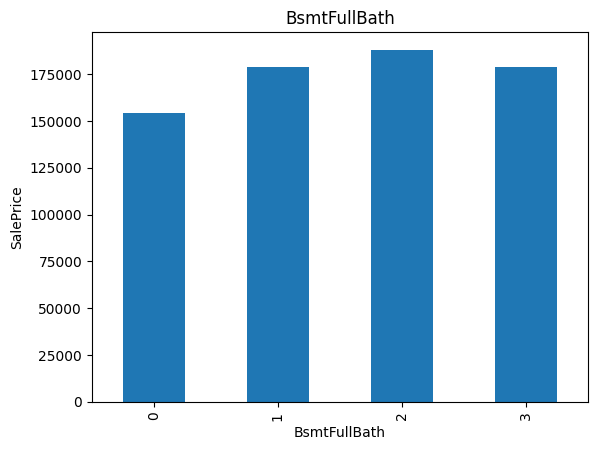

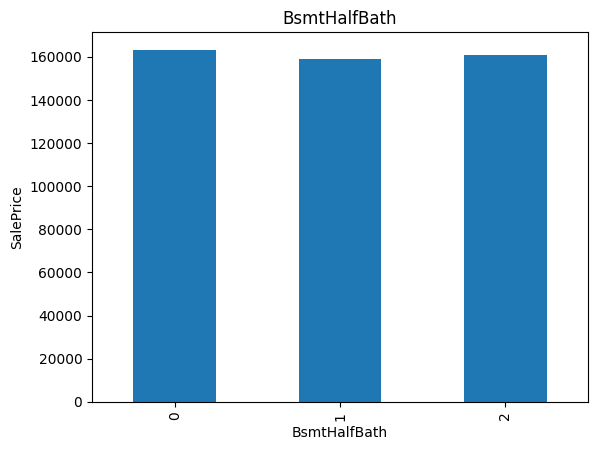

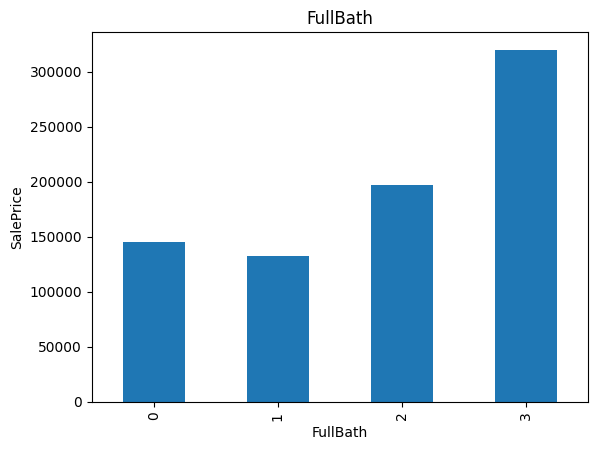

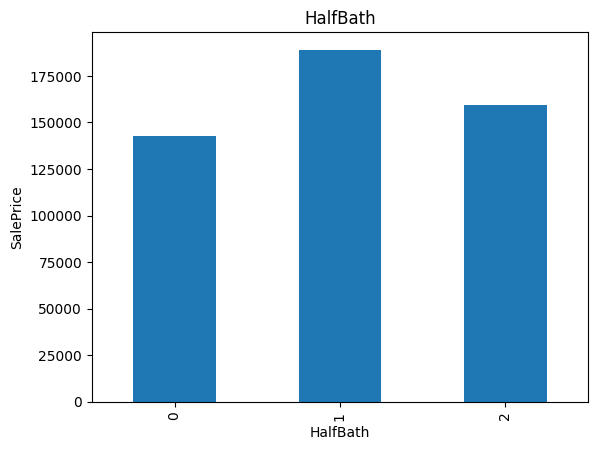

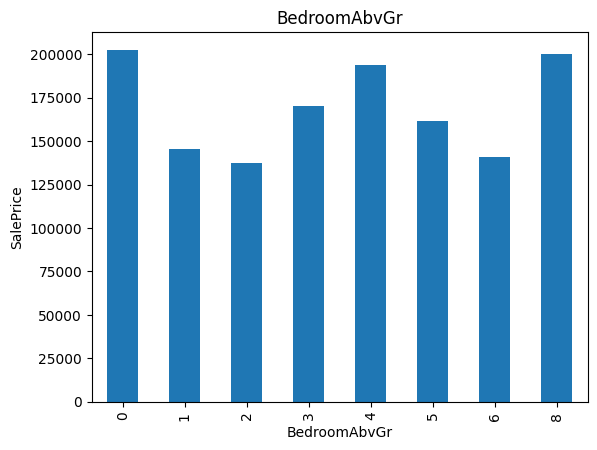

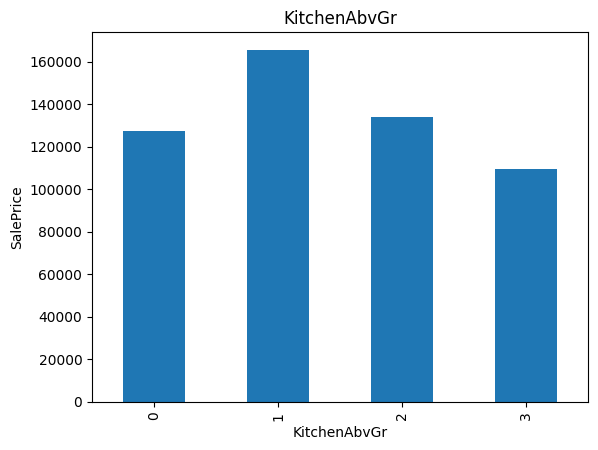

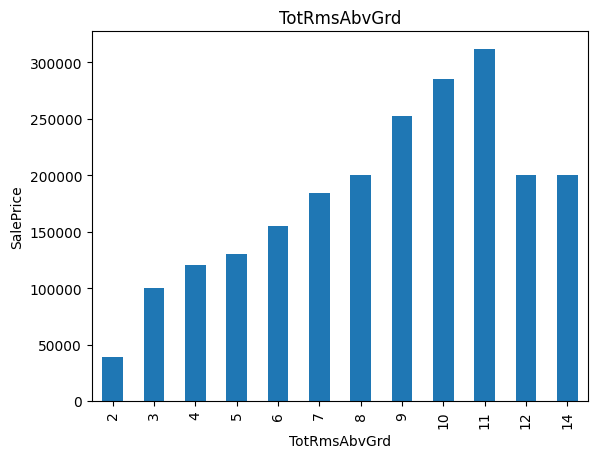

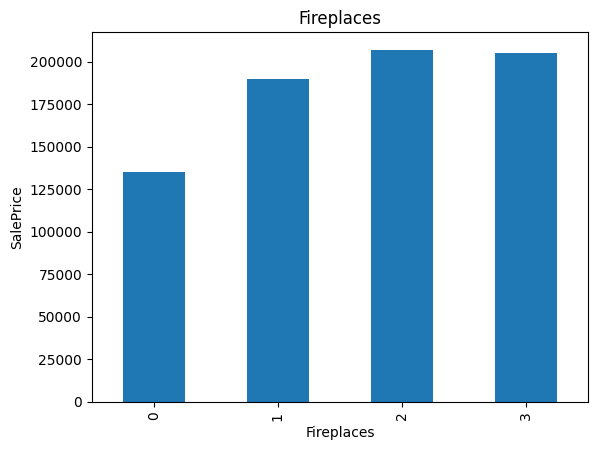

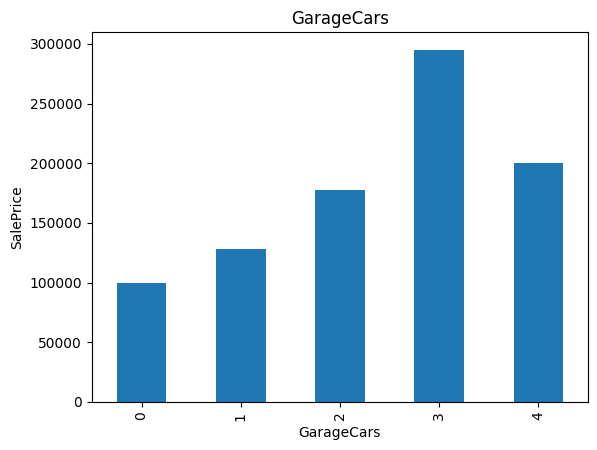

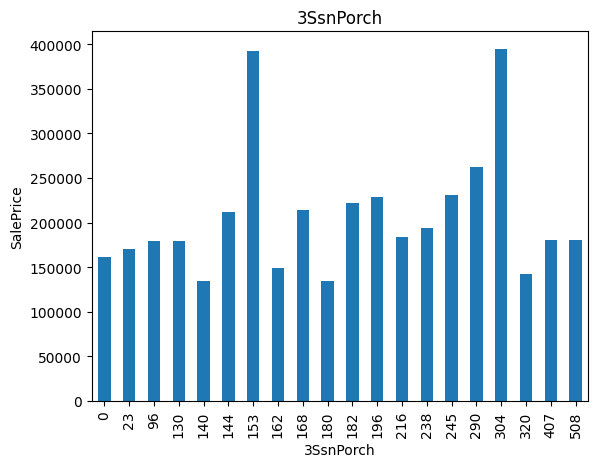

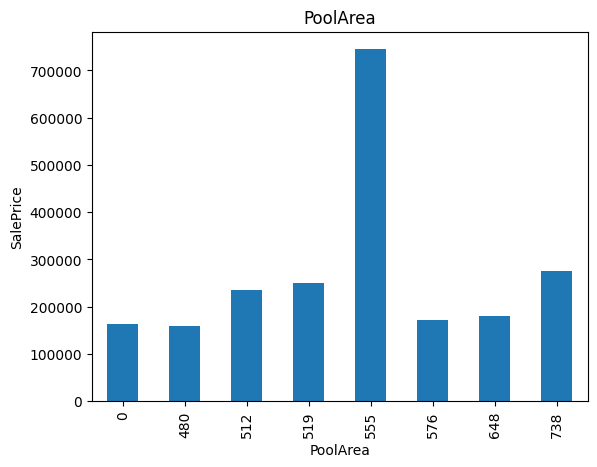

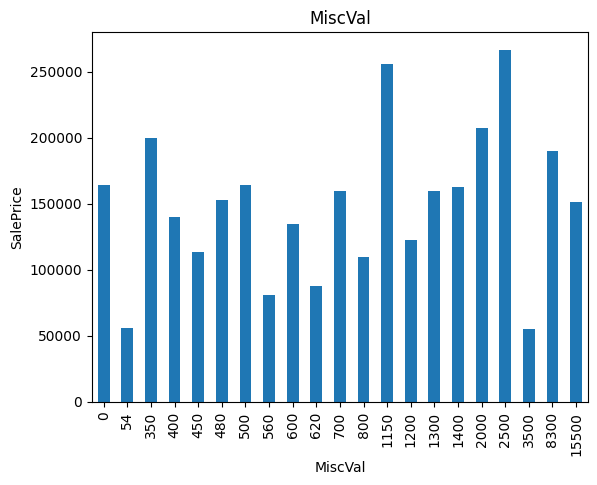

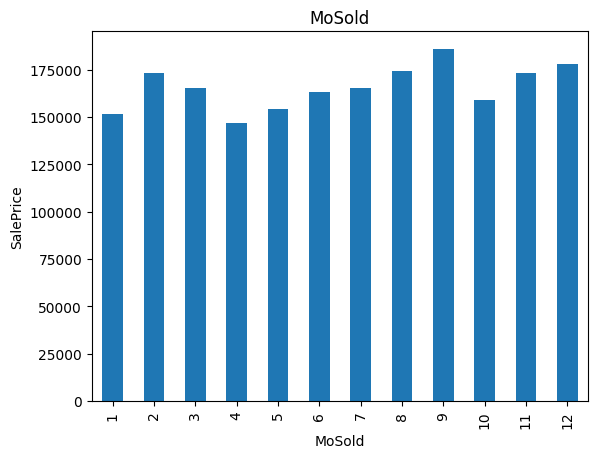

In [ ]:
for feature in discrete_feature:
    data=data_set.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [14]:
continous_feature=[feature for feature in numerical_feature if feature not in discrete_feature + ['Id']]

NameError: name 'numerical_feature' is not defined

In [ ]:
len(continous_feature)

20

In [ ]:
for feature in continous_feature:
    data=data_set.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

NameError: name 'continous_feature' is not defined

In [ ]:
for feature in continous_feature:
    data=data_set.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

NameError: name 'continous_feature' is not defined

In [ ]:
for feature in continous_feature:
    data=data_set.copy()
    # copy function is ued in order to makke spearte copy for new dataset instead of directly assigning it to the variable data
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
categorical_features=[feature for feature in data_set.columns if data[feature].dtypes=='O']
#feature is written in starting of loop so that it know what to include in the list as it iterates over the columns

In [ ]:
len(categorical_features)

In [ ]:
data_set[categorical_features].head()

In [ ]:
for i in categorical_features:
    print("The feature is {} and number of categories are {}".format(i, len(data_set[i].unique())))


In [ ]:
for feature in categorical_features:
    data=data_set.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    